<a href="https://colab.research.google.com/github/rapidestlime/Eccomerce-SG-Webscraping/blob/main/amazonSG_bestsellling_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Import libraries

- Helps to install chromium browser properly with colab ubuntu 20.04lt


In [1]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap
# https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver and snap
apt-get update
apt-get install chromium chromium-driver
sudo apt install snapd

Executing: /tmp/apt-key-gpghome.j4Hd7IKf8y/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.uEadl1WL60/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.e7OZAVisxe/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian bust

*   Install selenium-wire and load selenium items

In [2]:
!pip install selenium-wire

# Load selenium components
from seleniumwire import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import TimeoutException

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 KB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 6.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling url

* Install and load other crucial libraries

In [3]:
!pip install 'bigtree[image]'

# load other crucial libraries
from bigtree import Node, print_tree, find, find_name, find_path, find_full_path, find_attr, levelordergroup_iter,prune_tree
from bs4 import BeautifulSoup
import requests as req
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast
import traceback
import pprint
import gzip
import json
import pickle
from multiprocessing import Pool
from os import getpid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 KB 5.0 MB/s eta 0:00:00


# 2.Setup chromedriver

In [4]:
# set up chrome driver
def driversetup():
    caps = DesiredCapabilities().CHROME
    #caps["pageLoadStrategy"] = "normal"  #  Waits for full page load
    caps["pageLoadStrategy"] = "eager"  #  Waits for page to be interactive
    #caps["pageLoadStrategy"] = "none"   # Do not wait for full page load
    options = webdriver.ChromeOptions()
    #run Selenium in headless mode
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    #overcome limited resource problems
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("lang=en")
    #open Browser with set window size
    options.add_argument("--window-size=1920,1080")
    #disable infobars
    options.add_argument("disable-infobars")
    #disable extension
    options.add_argument("--disable-extensions")
    #other settings 
    options.add_argument("--incognito")
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.add_argument("enable-features=NetworkServiceInProcess")
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--ignore-ssl-errors')
    options.add_argument("--disable-gpu")
    options.add_argument("--log-level=3")
    options.add_argument('disable-features=NetworkService')
    # add user agent
    options.add_argument('--user-agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36"')
    driver = webdriver.Chrome(desired_capabilities=caps,executable_path="/usr/bin/chromedriver",options=options)
    
    return driver

# 3.Map out category tree of Amazon best-selling

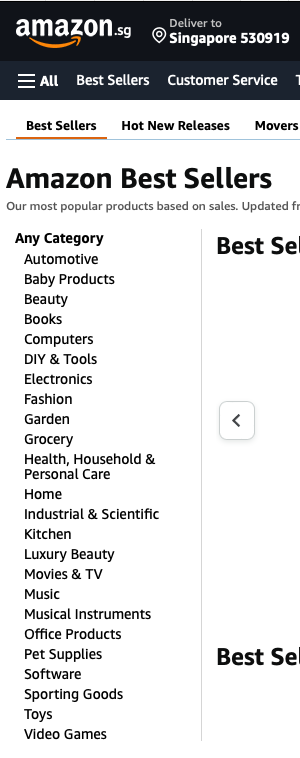

## Build function to build category tree of "best-sellers"


### Function to capture base categories

In [5]:
def get_base_cat(root, driver):
    
    driver.get(root.link)
    
  
    # containers for name and urls 
    names = []
    urls = []
    
    # container to hold base category nodes
    base_nodes = []

    data = driver.find_elements(By.CLASS_NAME, '_p13n-zg-nav-tree-all_style_zg-browse-item__1rdKf._p13n-zg-nav-tree-all_style_zg-browse-height-small__nleKL')
    
    for e in data:
        names.append(e.text)
        urls.append(e.find_element(By.TAG_NAME, 'a').get_attribute('href'))
    
    # set up base categories
    for idx,e in enumerate(names):
        base_nodes.append(Node(f"{e}",link=urls[idx]))
    
    driver.close()
    print(names)
    return base_nodes

### Function to extend category nodes

In [6]:
def extend_cat(node, driver, latest_lvl):
    
    # try-except block to avoid disruption from timeout exception from chromedriver 
    try:
        driver.get(node.link)
        time.sleep(0.25)
    except TimeoutException:
        extend_cat(node,driver,latest_lvl)

    # containers for names and urls and data 
    names = []
    urls = []
    data = []
    
    # extracts elements with categories
    try:
        data = driver.find_element(By.CSS_SELECTOR,'div[role=group]').find_elements(By.CSS_SELECTOR,'div[role=treeitem')
    except:
        print(node.link)
        extend_cat(node,driver,latest_lvl)    
    
    for e in data:
        names.append(e.text)
        if e.find_elements(By.TAG_NAME, 'span') != []: # account for no link if a category do not have any sub categories
            urls.append('END')
        else:
            urls.append(e.find_element(By.TAG_NAME, 'a').get_attribute('href'))
    
    
    # check for duplicates in names and renames to to avoid duplicate node name
    names = list(map(lambda x: x[1] + str(names[:x[0]].count(x[1]) + 1) if names.count(x[1]) > 1 else x[1], enumerate(names)))
    
    # create backup of current node for webpage bugs at times
    node_copy = node.copy()

    # base case
    if 'END' in urls or names == latest_lvl:
        pass
    # extend node if new elements found
    else:
        for idx,e in enumerate(names):
            try:
                Node(f"{e}",link=urls[idx],parent=node)
            except:
                extend_cat(node_copy,driver,latest_lvl)
    

### Function to extend base category nodes

* process each base category seperately to speed up with multiprocessing

In [7]:
def extend_base_cat(base_node):
    driver = driversetup()
    max_depth = 1 # current depth tree

    while max_depth < 4: # max number of nodes in a path is 4, note sometimes amazon redirects to another cat branch path
        latest_lvl = [[node.node_name for node in group] for group in levelordergroup_iter(base_node)][-1].copy()
        latest_nodes = [[node for node in group] for group in levelordergroup_iter(base_node)][-1].copy()
        
        for node in latest_nodes:
            extend_cat(node,driver,latest_lvl)
        
        max_depth += 1
        print(f"tier {max_depth} for base cat {base_node.node_name} completed", flush=True)
    
    driver.close()
    
    print(f"All tiers for base cat {base_node.node_name} completed Process {getpid()}", flush=True)
    print(f"base cat max depth {base_node.max_depth}", flush=True)    # sanity check
    return base_node


# Set up root Node

In [8]:
root = Node('.',link='https://www.amazon.sg/gp/bestsellers/ref=zg_bsnr_tab')

In [ ]:
#del pool
#del root
#del base_nodes

# Build out full category tree 



*   use multiprocessing to process each base category node concurrently, simple for-loop will take very long




In [9]:
base_nodes = get_base_cat(root,driversetup())

# process half of base nodes seperately for more stability
final_results_1 = []
final_results_2 = []

if __name__ == '__main__':
    with Pool(processes=8) as pool:
        sub_cat_trees = pool.map(extend_base_cat, base_nodes[0:13],chunksize=1)
        final_results_1 = [cat_tree for cat_tree in sub_cat_trees]

if __name__ == '__main__':
    with Pool(processes=8) as pool:
        sub_cat_trees = pool.map(extend_base_cat, base_nodes[13:],chunksize=1)
        final_results_2 = [cat_tree for cat_tree in sub_cat_trees]

pool.close()
# personal note: beware of pickling, cannot pickle driver object https://xang1234.github.io/multiprocessing/

['Automotive', 'Baby Products', 'Beauty', 'Books', 'Computers', 'DIY & Tools', 'Electronics', 'Fashion', 'Garden', 'Grocery', 'Health, Household & Personal Care', 'Home', 'Industrial & Scientific', 'Kitchen', 'Luxury Beauty', 'Movies & TV', 'Music', 'Musical Instruments', 'Office Products', 'Pet Supplies', 'Software', 'Sporting Goods', 'Toys', 'Video Games']
tier 2 for base cat Automotive completed
tier 2 for base cat Fashion completed
tier 2 for base cat Beauty completed
tier 2 for base cat DIY & Tools completed
tier 2 for base cat Baby Products completed
tier 2 for base cat Electronics completed
tier 2 for base cat Computers completed
tier 2 for base cat Books completed
tier 3 for base cat Computers completed
tier 4 for base cat Computers completed
All tiers for base cat Computers completed Process 5077
base cat max depth 1
tier 2 for base cat Garden completed
tier 3 for base cat Automotive completed
tier 3 for base cat Beauty completed
tier 3 for base cat Fashion completed
tier 3 fo

* Store all base category trees to dictionary

In [13]:
cat_trees = final_results_1 + final_results_2
cat_tree_dictionary = {cat_tree.name: cat_tree for cat_tree in cat_trees}

In [15]:
cat_tree_dictionary.keys()

dict_keys(['Automotive', 'Baby Products', 'Beauty', 'Books', 'Computers', 'DIY & Tools', 'Electronics', 'Fashion', 'Garden', 'Grocery', 'Health, Household & Personal Care', 'Home', 'Industrial & Scientific', 'Kitchen', 'Luxury Beauty', 'Movies & TV', 'Music', 'Musical Instruments', 'Office Products', 'Pet Supplies', 'Software', 'Sporting Goods', 'Toys', 'Video Games'])

* Store all base category trees into a pickle object for easy future referencing

In [16]:
import pickle

# Store data (serialize)
with open('cat_trees.pickle', 'wb') as handle:
    pickle.dump(cat_tree_dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load data (deserialize)
#with open('cat_trees.pickle', 'rb') as handle:
#    unserialized_data = pickle.load(handle)

* **example** of base category node tree, in this case base category of Toys




In [ ]:
# test = extend_base_cat(Node('Toys',link='https://www.amazon.sg/gp/bestsellers/toys/ref=zg_bs_unv_toys_1_14692660051_4'))

tier 2 for base cat Toys completed
tier 3 for base cat Toys completed
tier 4 for base cat Toys completed
All tiers for base cat Toys completed Process 691
base cat max depth 4


In [ ]:
# print_tree(test)

Toys
├── Arts & Crafts
│   ├── Clay & Dough
│   │   ├── Clay
│   │   └── Dough
│   ├── Craft Kits
│   │   ├── Drawing
│   │   ├── Felt
│   │   ├── Flower Pressing
│   │   ├── Jewelry Making & Beadwork
│   │   ├── Paint-by-Number
│   │   ├── Painting
│   │   ├── Papercraft
│   │   ├── Plugging Art
│   │   ├── Scrapbooking
│   │   ├── Sewing
│   │   ├── Weaving
│   │   └── Wood
│   ├── Drawing & Painting Supplies
│   │   ├── Chalk
│   │   ├── Colouring Pencils
│   │   ├── Colouring Pens & Markers
│   │   ├── Crayons
│   │   ├── Drawing Pads & Books
│   │   ├── Easels
│   │   ├── Paintbrushes
│   │   ├── Paints
│   │   ├── Pencil Erasers
│   │   ├── Scissors
│   │   ├── Sharpeners
│   │   └── Watercolour Paper
│   ├── Fuse Beads
│   ├── Mosaic Kits
│   ├── Printing & Stamping
│   └── Yarn
├── Baby & Toddler Toys
│   ├── Activity Centres
│   ├── Baby Toys
│   │   ├── Baby Balls
│   │   ├── Mirrors
│   │   ├── Pushchair & Pram Toys
│   │   └── Rattles & Plush Rings
│   ├── Bath Toys
│   ├──

This could be useful data where we can see a full curation of types of product sub-classes in each base category

# 4.Extract Top 50 results from page

## Create fill top 50 results array function

In [ ]:
def fill_top50_array(driver,params,array):
    """
    Description:
      fill up top50_array that stores all data
    Arguments:
      Driver: webdriver object having state of current product url to extract data from [webdriver object]
      params: get required keys for referencing in product data [dictionary object]
      array: container to store results [dictionary object]
    Returns:
      results: returns top 50 products for sub category page [dataframe object]
    """
    # grab all results with unique tag & id
    top50 = driver.find_elements(By.CSS_SELECTOR,'div[id=gridItemRoot]')

    if top50 != None:
        
        for e in top50:
            
            for k,v in params.items():
                
                if k in ('name','image_link','product_link'):
                    data = e.find_element(v[0],v[1]).get_attribute(v[2])
                    array[k].append(data)

                elif k in ('rating','total_ratings'):
                    data = e.find_elements(v[0],v[1])
                    if data != []:
                        if k == 'rating':
                            array[k].append(float(data[0].find_element(v[2],v[3]).get_attribute(v[4]).split(' ')[0]))
                        elif k == 'total_ratings':
                            array[k].append(int(data[0].find_element(v[2],v[3]).text.replace(',','')))
                    else:
                        array[k].append(None) 
                
                elif k in ('rank'):
                    data = int(e.find_element(v[0],v[1]).text.strip('#'))
                    array[k].append(data)
    
    else:
        print('No results for this sub category page!')
    
    driver.close()

    results = pd.DataFrame.from_dict(top50_array)

    return results

# Initialise Containers

* Stores top 50 data

In [ ]:
top50_array = {'name':[],
               'rating':[],
               'total_ratings':[],
               'rank':[],
               'image_link': [],
               'product_link': []    
}

* stores keys for referencing 

In [ ]:
top50_params = {'name':[By.CLASS_NAME, 'a-dynamic-image.p13n-sc-dynamic-image.p13n-product-image','alt'], # index first 50
               'rating':[By.CLASS_NAME, 'a-icon-row',By.CLASS_NAME, 'a-link-normal','title'],
               'total_ratings':[By.CLASS_NAME, 'a-icon-row',By.CLASS_NAME, 'a-size-small'],
               'rank':[By.CLASS_NAME, 'zg-bdg-text'],
               'image_link': [By.CLASS_NAME, 'a-dynamic-image.p13n-sc-dynamic-image.p13n-product-image','src'],
               'product_link': [By.CLASS_NAME, 'a-link-normal','href']    # take first one 
}


# grab all containers with div with id: griditemroot

# Run function on example category page

* in this case example its **fashion>men>shoes** page

In [ ]:
sample = driversetup()
sample.get('https://www.amazon.sg/gp/bestsellers/automotive/ref=zg_bs_nav_0')

# ensures dynamic top listings are fully loaded
sample.execute_script("window.scrollTo({top: document.body.scrollHeight, behavior: 'smooth'});")
time.sleep(1)
sample.execute_script("arguments[0].scrollIntoView();", sample.find_element(By.CLASS_NAME,'navLeftFooter.nav-sprite-v1'))
time.sleep(1)

In [ ]:
# sanity check
len(sample.find_elements(By.CSS_SELECTOR,'div[id=gridItemRoot]'))

50

In [ ]:
fill_top50_array(sample, top50_params, top50_array)

,name,rating,total_ratings,rank,image_link,product_link
0,"Weiman Leather Wipes, 7 x 8 Inches, (Pack of 30)",4.5,6433.0,1,https://images-fe.ssl-images-amazon.com/images...,https://www.amazon.sg/Weiman-Leather-Wipes-Inc...
1,Car Key Case | PU Leather Key Pouch for Car Ke...,NaN,NaN,2,https://images-fe.ssl-images-amazon.com/images...,https://www.amazon.sg/Portable-Handmade-Pull-o...
2,AstroAI Electric Air Pump 150PSI Portable Bicy...,4.4,458.0,3,https://images-fe.ssl-images-amazon.com/images...,https://www.amazon.sg/AstroAI-Compressor-Motor...
3,"Polyte Microfibre Cleaning Cloth 30x40 cm, Blu...",4.7,5365.0,4,https://images-fe.ssl-images-amazon.com/images...,https://www.amazon.sg/Polyte-Microfibre-Cleani...
4,The Rag Company - The Gauntlet Microfiber Dryi...,4.8,3362.0,5,https://images-fe.ssl-images-amazon.com/images...,https://www.amazon.sg/Rag-Company-Gauntlet-Mic...
5,Armor All Microfibre 6 Cleaning Cloths,4.8,38.0,6,https://images-fe.ssl-images-amazon.com/images...,https://www.amazon.sg/Armor-All-Microfibre-Cle...
6,J-B Weld 8237 PlasticWeld Plastic Repair Epoxy...,4.4,9607.0,7,https://images-fe.ssl-images-amazon.com/images...,https://www.amazon.sg/J-B-Weld-8237-PlasticWel...
7,"Bonform 6279-82BK Car Mat, 3D Prime, For Light...",4.3,1309.0,8,https://images-fe.ssl-images-amazon.com/images...,https://www.amazon.sg/Bonform-6279-82BK-Prime-...
8,Bosch Rear Wiper Blade A330H/3397008006 Origin...,4.7,121412.0,9,https://images-fe.ssl-images-amazon.com/images...,https://www.amazon.sg/Bosch-A330H-3397008006-E...
9,Ambipur Car Mini Clip Lavender Comfort Car Air...,NaN,NaN,10,https://images-fe.ssl-images-amazon.com/images...,https://www.amazon.sg/Ambipur-Lavender-Comfort...


In [ ]:
sample.close()

Personal References
- https://medium.com/swlh/making-data-trees-in-python-3a3ceb050cfd

